In [1]:
import os
import numpy as np

import random as rn

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense, Flatten, Activation, Conv1D, LSTM, CuDNNLSTM, Reshape, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv3D, Conv2D, ConvLSTM2D, BatchNormalization, TimeDistributed,MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, AveragePooling3D,  MaxPooling3D, Dropout, Reshape

from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Nadam
from tensorflow.keras import backend as K

## reproducibility
os.environ['PYTHONHASHSEED'] = '0'
# for starting Numpy generated random numbers in a well-defined initial state.
# fix random seed for reproducibility
seed = 7 # 42, 7
np.random.seed(seed)
# for starting core Python generated random numbers in a well-defined state.
rn.seed(12345)
# Force TensorFlow to use single thread. Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# The below tf.set_random_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.set_random_seed(1234)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15547408499865625120
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3214816051
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10634853506073930757
physical_device_desc: "device: 0, name: GeForce GTX 850M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [3]:
# Sets and parameters for training should be given here for both estimations and corresponding frames
'Note that for estimation length i.e. LS_5Tap or 21Tap it should be changed manually in the code'
import scipy.io as spio 

# set_num_train = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
set_num_train = [1,2,3,4,5,7,9,10,11,12,13,14,15]
set_num_validation = [6]
set_num_test = [8]

set_num_prep = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

subsampling_factor = 10
subsampling_factor_str = str(subsampling_factor)

img_height = int(720/subsampling_factor)
img_width = int(1280/subsampling_factor)

Img_format = 'Depth'

set_start_offset = 0
set_stop_offset = None

In [19]:
print(Img_format)
print(img_dim)

Depth
1


## Estimations from .mat to .npy files 

In [40]:
# SAVE: Estimations, This is to concatenate obtained channel estimations for each set into .npy file to load them later easily 

for j in set_num_prep:
    set_str = str(j)
    print("Dataset num: " + set_str )
    
    set_mat = spio.loadmat('F:\Git\Codes\Artifacts_Evaluation\Obtained_Ground_Chan_Est_Datasets\Dataset_set'+set_str+'_only_est_eq_phase.mat', struct_as_record=False,squeeze_me=True)
    mat_dataset = np.copy(set_mat['Dataset_set'])
    
    Train_LS_est_overall = []
    set_name = ''
    print(mat_dataset.shape)
    for i in range(0,mat_dataset.shape[0]):
        
        'Below flattens the complex estimation i.e if LS.11Tap is used'
        ' shape would be 2x11 but with below makes it [real(1x11),imag(1x11)]: 1x22 matrix'
        LS_est = np.array([mat_dataset[i].LS_11Tap_Corr.real,mat_dataset[i].LS_11Tap_Corr.imag]).reshape(1,mat_dataset[i].LS_11Tap_Corr.shape[0]*2)
        
        if(i == 0): 
            Train_LS_est_overall = np.copy(LS_est)
        else:
            Train_LS_est_overall = np.concatenate((Train_LS_est_overall,LS_est),axis = 0)
    
    set_name = set_name+'_'+set_str
    
    overall_LS_est_train_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Chan_Est_Datasets\LS_npy_Versions\LS_Estimations_11Tap_Sets' + set_name+'.npy'
    np.save(overall_LS_est_train_path_save,Train_LS_est_overall)
    
    print(Train_LS_est_overall.shape)
    print("Estimations for Set: "+ set_str +" is saved")
    
print("All sets are finished!")

Dataset num: 1
(2822,)
(2822, 22)
Estimations for Set: 1 is saved
Dataset num: 2
(2319,)
(2319, 22)
Estimations for Set: 2 is saved
Dataset num: 3
(2609,)
(2609, 22)
Estimations for Set: 3 is saved
Dataset num: 4
(1478,)
(1478, 22)
Estimations for Set: 4 is saved
Dataset num: 5
(1397,)
(1397, 22)
Estimations for Set: 5 is saved
Dataset num: 6
(1460,)
(1460, 22)
Estimations for Set: 6 is saved
Dataset num: 7
(1513,)
(1513, 22)
Estimations for Set: 7 is saved
Dataset num: 8
(1213,)
(1213, 22)
Estimations for Set: 8 is saved
Dataset num: 9
(1223,)
(1223, 22)
Estimations for Set: 9 is saved
Dataset num: 10
(994,)
(994, 22)
Estimations for Set: 10 is saved
Dataset num: 11
(1201,)
(1201, 22)
Estimations for Set: 11 is saved
Dataset num: 12
(1243,)
(1243, 22)
Estimations for Set: 12 is saved
Dataset num: 13
(1272,)
(1272, 22)
Estimations for Set: 13 is saved
Dataset num: 14
(1041,)
(1041, 22)
Estimations for Set: 14 is saved
Dataset num: 15
(919,)
(919, 22)
Estimations for Set: 15 is saved
Al

## Image frames reshaping and saving to .npy files for each set

In [18]:
# SAVE: Image Data 'Set-by-Set': This is to concatenate recorded frames for each set into .npy file to load them later easily

for j in set_num_prep:
    set_str = str(j)
    print("Dataset num: " + set_str )
    dataset_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Images\Set'+set_str+'\Set'+set_str+'_Subsampled_'+subsampling_factor_str+'\\'+Img_format+'_Frames.npy'
    Dataset_frames = np.load(dataset_path_save)
    print(Dataset_frames.shape)
    
    set_mat = spio.loadmat('F:\Git\Codes\Artifacts_Evaluation\Obtained_Ground_Chan_Est_Datasets\Dataset_set'+set_str+'_only_est_eq_phase.mat', struct_as_record=False,squeeze_me=True)
    mat_dataset = np.copy(set_mat['Dataset_set'])
    first_frame = mat_dataset[0].Frame_Number
    print(mat_dataset.shape)
    
    Train_frames_set = []
    set_name = ''
    
    for i in range(0,mat_dataset.shape[0]):
        
        frame = mat_dataset[i].Frame_Number
        "All dataset_frames are saved with offset so that the first image in a set is actually"
        "'frame'-30. Therefore if one wants to have the very first frame"
        "Then it is at Dataset_frames[30*img_height:31*img_height,:]"
        
        # Below corresponds to Current Frame
        frame_sequence = Dataset_frames[((frame-first_frame+30)*img_height):((frame-first_frame+30+1)*img_height),:] 
        if(i == 0): 
            Train_frames_set = np.copy(frame_sequence) 
        else:
            Train_frames_set = np.concatenate((Train_frames_set,frame_sequence),axis = 0)
    
    set_name = set_name+'_'+set_str
    print(Train_frames_set.shape)
    Train_frames_set = np.reshape(Train_frames_set,(-1,1,img_height,img_width,img_dim))
    print(Train_frames_set.shape)

    Frame_set_train_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Images\Set_by_set\\' + Img_format +'_Sub'+subsampling_factor_str+'_Sets'+set_name+'.npy'
    np.save(Frame_set_train_path_save,Train_frames_set)
    print("Frame Dataset for Set: "+ set_str +" is saved")
print("All sets are finished!")

Dataset num: 1
(613656, 128)
(2822,)
(203184, 128)
(2822, 1, 72, 128, 1)
Frame Dataset for Set: 1 is saved
Dataset num: 2
(505080, 128)
(2319,)
(166968, 128)
(2319, 1, 72, 128, 1)
Frame Dataset for Set: 2 is saved
Dataset num: 3
(567648, 128)
(2609,)
(187848, 128)
(2609, 1, 72, 128, 1)
Frame Dataset for Set: 3 is saved
Dataset num: 4
(323424, 128)
(1478,)
(106416, 128)
(1478, 1, 72, 128, 1)
Frame Dataset for Set: 4 is saved
Dataset num: 5
(305928, 128)
(1397,)
(100584, 128)
(1397, 1, 72, 128, 1)
Frame Dataset for Set: 5 is saved
Dataset num: 6
(319536, 128)
(1460,)
(105120, 128)
(1460, 1, 72, 128, 1)
Frame Dataset for Set: 6 is saved
Dataset num: 7
(330984, 128)
(1513,)
(108936, 128)
(1513, 1, 72, 128, 1)
Frame Dataset for Set: 7 is saved
Dataset num: 8
(266184, 128)
(1213,)
(87336, 128)
(1213, 1, 72, 128, 1)
Frame Dataset for Set: 8 is saved
Dataset num: 9
(268344, 128)
(1223,)
(88056, 128)
(1223, 1, 72, 128, 1)
Frame Dataset for Set: 9 is saved
Dataset num: 10
(218880, 128)
(994,)
(7

## Estimation concatenations (Training, Validation and Test set preparation)
### Next 5 Cells belong here

In [49]:
# Prepare Training Data from .npy versions of estimations to overall

for j in set_num_train:
    set_str = str(j)
    set_name = ''
    set_name = set_name+'_'+set_str
    print("Dataset num: " + set_str)
    overall_LS_est_train_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Chan_Est_Datasets\LS_npy_Versions\LS_Estimations_11Tap_Sets' + set_name+'.npy'
    Train_LS_set = np.load(overall_LS_est_train_path_save)
    print(Train_LS_set.shape)
    if(j == set_num_train[0]): 
        Train_LS_est_overall = np.copy(Train_LS_set[set_start_offset:set_stop_offset,:]) 
    else:
        Train_LS_est_overall = np.concatenate((Train_LS_est_overall,Train_LS_set[set_start_offset:set_stop_offset,:]),axis = 0)
    print(Train_LS_est_overall.shape)

Dataset num: 1
(2822, 22)
(2822, 22)
Dataset num: 2
(2319, 22)
(5141, 22)
Dataset num: 3
(2609, 22)
(7750, 22)
Dataset num: 4
(1478, 22)
(9228, 22)
Dataset num: 5
(1397, 22)
(10625, 22)
Dataset num: 7
(1513, 22)
(12138, 22)
Dataset num: 9
(1223, 22)
(13361, 22)
Dataset num: 10
(994, 22)
(14355, 22)
Dataset num: 11
(1201, 22)
(15556, 22)
Dataset num: 12
(1243, 22)
(16799, 22)
Dataset num: 13
(1272, 22)
(18071, 22)
Dataset num: 14
(1041, 22)
(19112, 22)
Dataset num: 15
(919, 22)
(20031, 22)


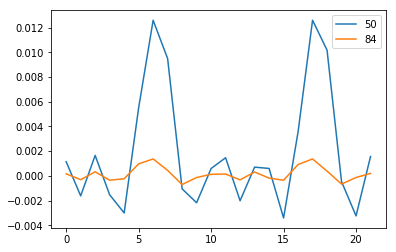

In [6]:
plt.plot(Train_LS_est_overall[50,:],label='50')
plt.plot(Train_LS_est_overall[84,:],label='84')
plt.legend()

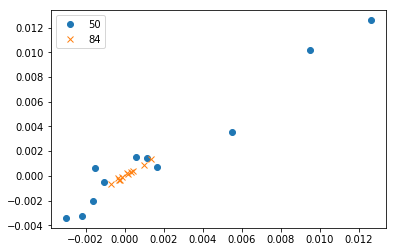

In [16]:
plt.plot(Train_LS_est_overall[50,:11],Train_LS_est_overall[50,11:],label='50',marker='o',linestyle="None")
plt.plot(Train_LS_est_overall[84,:11],Train_LS_est_overall[84,11:],label='84',marker='x',linestyle="None")
plt.legend()

In [50]:
# Prepare Validation Data from .npy versions of estimations to overall

for j in set_num_validation:
    set_str = str(j)
    set_name = ''
    set_name = set_name+'_'+set_str
    print("Dataset num: " + set_str )
    overall_LS_est_validation_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Chan_Est_Datasets\LS_npy_Versions\LS_Estimations_11Tap_Sets' + set_name+'.npy'
    Validation_LS_set = np.load(overall_LS_est_validation_path_save)
    print(Validation_LS_set.shape)
    if(j == set_num_validation[0]): 
        Validation_LS_est_overall = np.copy(Validation_LS_set[set_start_offset:set_stop_offset,:]) 
    else:
        Validation_LS_est_overall = np.concatenate((Validation_LS_est_overall,Validation_LS_set[set_start_offset:set_stop_offset,:]),axis = 0)
    print(Validation_LS_est_overall.shape)

Dataset num: 6
(1460, 22)
(1460, 22)


In [51]:
# Prepare Test Data from .npy versions of estimations to overall

for j in set_num_test:
    set_str = str(j)
    set_name = ''
    set_name = set_name+'_'+set_str
    print("Dataset num: " + set_str )
    overall_LS_est_test_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Chan_Est_Datasets\LS_npy_Versions\LS_Estimations_11Tap_Sets' + set_name+'.npy'
    Test_LS_set = np.load(overall_LS_est_test_path_save)
    print(Test_LS_set.shape)
    if(j == set_num_test[0]): 
        Test_LS_est_overall = np.copy(Test_LS_set[set_start_offset:set_stop_offset,:])
    else:
        Test_LS_est_overall = np.concatenate((Test_LS_est_overall,Test_LS_set[set_start_offset:set_stop_offset,:]),axis = 0)
    print(Test_LS_est_overall.shape)

Dataset num: 8
(1213, 22)
(1213, 22)


## Image Data Concatenation (Training, Validation and Test set preparation)
### Next 3 Cells belong here

In [42]:
# Prepare Training Data from 'Set-by-Set'Frames to overall

for j in set_num_train:
    set_str = str(j)
    set_name = ''
    set_name = set_name+'_'+set_str
    print("Dataset num: " + set_str )
    dataset_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Images\Set_by_set\\' + Img_format +'_Sub'+subsampling_factor_str+'_Sets'+set_name+'.npy'
    Train_frames_set = np.load(dataset_path_save)
    print(Train_frames_set.shape)
    if(j == set_num_train[0]): 
        Train_frames_overall = np.copy(Train_frames_set[set_start_offset:set_stop_offset,:,:,:,:]) 
    else:
        Train_frames_overall = np.concatenate((Train_frames_overall,Train_frames_set[set_start_offset:set_stop_offset,:,:,:,:]),axis = 0)
    print(Train_frames_overall.shape)

Dataset num: 1
(2822, 1, 72, 128, 1)
(2822, 1, 72, 128, 1)
Dataset num: 2
(2319, 1, 72, 128, 1)
(5141, 1, 72, 128, 1)
Dataset num: 3
(2609, 1, 72, 128, 1)
(7750, 1, 72, 128, 1)
Dataset num: 4
(1478, 1, 72, 128, 1)
(9228, 1, 72, 128, 1)
Dataset num: 5
(1397, 1, 72, 128, 1)
(10625, 1, 72, 128, 1)
Dataset num: 7
(1513, 1, 72, 128, 1)
(12138, 1, 72, 128, 1)
Dataset num: 9
(1223, 1, 72, 128, 1)
(13361, 1, 72, 128, 1)
Dataset num: 10
(994, 1, 72, 128, 1)
(14355, 1, 72, 128, 1)
Dataset num: 11
(1201, 1, 72, 128, 1)
(15556, 1, 72, 128, 1)
Dataset num: 12
(1243, 1, 72, 128, 1)
(16799, 1, 72, 128, 1)
Dataset num: 13
(1272, 1, 72, 128, 1)
(18071, 1, 72, 128, 1)
Dataset num: 14
(1041, 1, 72, 128, 1)
(19112, 1, 72, 128, 1)
Dataset num: 15
(919, 1, 72, 128, 1)
(20031, 1, 72, 128, 1)


In [43]:
# Prepare Validation Data from 'Set-by-Set'Frames to overall

for j in set_num_validation:
    set_str = str(j)
    set_name = ''
    set_name = set_name+'_'+set_str
    print("Dataset num: " + set_str )
    dataset_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Images\Set_by_set\\' + Img_format +'_Sub'+subsampling_factor_str+'_Sets'+set_name+'.npy'
    Validation_frames_set = np.load(dataset_path_save)
    print(Validation_frames_set.shape)
    if(j == set_num_validation[0]):
        Validation_frames_overall = np.copy(Validation_frames_set[set_start_offset:set_stop_offset,:,:,:,:])
    else:
        Validation_frames_overall = np.concatenate((Validation_frames_overall,Validation_frames_set[set_start_offset:set_stop_offset,:,:,:,:]),axis = 0)
    print(Validation_frames_overall.shape)

Dataset num: 6
(1460, 1, 72, 128, 1)
(1460, 1, 72, 128, 1)


In [44]:
# Prepare Test Data from 'Set-by-Set'Frames to overall

for j in set_num_test:
    set_str = str(j)
    set_name = ''
    set_name = set_name+'_'+set_str
    print("Dataset num: " + set_str )
    dataset_path_save = 'F:\Git\Codes\Artifacts_Evaluation\Images\Set_by_set\\' + Img_format +'_Sub'+subsampling_factor_str+'_Sets'+set_name+'.npy'
    Test_frames_set = np.load(dataset_path_save)
    print(Test_frames_set.shape)
    if(j == set_num_test[0]): 
        Test_frames_overall = np.copy(Test_frames_set[set_start_offset:set_stop_offset,:,:,:,:])
    else:
        Test_frames_overall = np.concatenate((Test_frames_overall,Test_frames_set[set_start_offset:set_stop_offset,:,:,:,:]),axis = 0)
    print(Test_frames_overall.shape)

Dataset num: 8
(1213, 1, 72, 128, 1)
(1213, 1, 72, 128, 1)


## Further subsampling on loaded frames (Next 3 Cells)

In [24]:
# If the sumsampled version is to be subsampled again
# FOR TRAIN

more_subsample_factor = 2
Train_frames_overall = np.copy(Train_frames_overall[:,:,::more_subsample_factor,::more_subsample_factor,:])
print(Train_frames_overall.shape)

(2822, 1, 90, 160, 1)


In [ ]:
# If the sumsampled version is to be subsampled again
# FOR VALIDATION

more_subsample_factor = 2
Validation_frames_overall = np.copy(Validation_frames_overall[:,:,::more_subsample_factor,::more_subsample_factor,:])
print(Validation_frames_overall.shape)

In [ ]:
# If the sumsampled version is to be subsampled again
# FOR TEST

more_subsample_factor = 2
Test_frames_overall = np.copy(Test_frames_overall[:,:,::more_subsample_factor,::more_subsample_factor,:])
print(Test_frames_overall.shape)


## Visualization of Depth Images in Jupyter Notebook

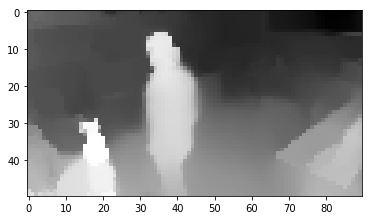

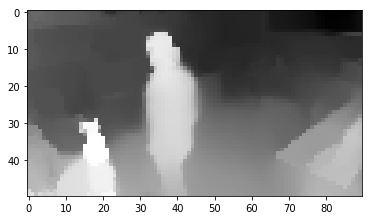

(50, 90)


In [23]:
# For visualization before CROPPING to be sure which parts should be cropped

plt.imshow(Train_frames_overall[195,0,12:62,24:114,0],cmap="gray") # ,cmap="gray"
plt.show()

plt.imshow(Train_frames_overall[195,0,12:62,24:114,0],cmap="gray") # ,cmap="gray"
plt.show()

print(Train_frames_overall[255,0,12:62,24:114,0].shape)

## Cropping for image size reduction (as in VVD Paper)

In [45]:
# If the frames to be cropped
# FOR TRAIN
# FOR 10 SUB _ Harsh: 12:50,46:100       12:62,24:114
# FOR 4 SUB: 10:80,25:145

Train_frames_overall_crop = np.copy(Train_frames_overall[:,:,12:62,24:114,:])
print(Train_frames_overall_crop.shape)

(20031, 1, 50, 90, 1)


In [46]:
# If the frames to be cropped
# FOR VALIDATION

Validation_frames_overall_crop = np.copy(Validation_frames_overall[:,:,12:62,24:114,:])
print(Validation_frames_overall_crop.shape)

(1460, 1, 50, 90, 1)


In [47]:
# If the frames to be cropped
# FOR TEST

Test_frames_overall_crop = np.copy(Test_frames_overall[:,:,12:62,24:114,:])        
print(Test_frames_overall_crop.shape)

(1213, 1, 50, 90, 1)


## Our Proposed CNN Model for VVD
#### Note that it can be used with 3 Frame before/1 Frame before/ Current Frame estimations with a few change
#### Namely VVD-100ms future, VVD-33.3ms future and VVD-Current methods

In [28]:
from keras import initializers
from keras.models import load_model

x = Input(shape=(Train_frames_overall_crop.shape[2:]))

Conv1 = Conv2D(32, (3, 3),activation= 'relu', padding='same',name='Conv1')(x)
AveragePool1 = AveragePooling2D((2, 2),padding='same',name='AveragePool1')(Conv1)

Conv2 = Conv2D(64, (5, 5),activation= 'relu', padding='same',name='Conv2')(AveragePool1)
AveragePool2 = AveragePooling2D((2, 2), padding='same',name='AveragePool2')(Conv2)

Conv3 = Conv2D(128, (5, 5), activation= 'relu', padding='same',name='Conv3')(AveragePool2) 
AveragePool3 = AveragePooling2D((2, 2), padding='same', name='AveragePool3')(Conv3) 

Conv4 = Conv2D(64, (3, 3), activation= 'relu', padding='same',name='Conv4')(AveragePool3) 
AveragePool4 = AveragePooling2D((2, 2), padding='same',name='AveragePool4')(Conv4) 

Flatten1 = Flatten(name='Flatten1')(AveragePool4)  
Dense1 = Dense(256, activation = 'relu',name='Dense1')(Flatten1)

Dense_out = Dense(Train_LS_est_overall.shape[1],name='Dense_out')(Dense1) 

model = Model(inputs=[x],outputs=Dense_out)

model.compile(optimizer= Nadam(lr=0.0001),
              loss='mse',
               metrics=['mae'])
# model.load_weights("F:\Git\Codes\Artifacts_Evaluation\Codes\Keras_ML_models\Nadam_4Conv2_Kernel3_5_5_3_11Tap_50x90_Dense_NoBN_averagepool_current_cross_val\v1\weights-102.hdf5")

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 90, 1)         0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 50, 90, 32)        320       
_________________________________________________________________
AveragePool1 (AveragePooling (None, 25, 45, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 25, 45, 64)        51264     
_________________________________________________________________
AveragePool2 (AveragePooling (None, 13, 23, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 13, 23, 128)       204928    
_________________________________________________________________
AveragePool3 (AveragePooling (None, 7, 12, 128)        0         
__________

In [55]:
# Use cautiously as it overrides the previous saved model!!!
# model.save('F:\Git\Codes\Artifacts_Evaluation\Codes\Keras_ML_models\Nadam_4Conv2_Kernel3_5_5_3_11Tap_50x90_Dense_NoBN_averagepool_current_cross_val\v1\Nadam_4Conv2_Kernel3_5_5_3_11Tap_valid_6_test_8_complete_50x90_Dense_NoBN_averagepool_Complete.h5')

## Callbacks for including adaptive learning rate, checkpoint 
#### A variant of early stopping algorithm

In [38]:
## Callbacks model

from keras.callbacks import ModelCheckpoint

# early stopping
esCallBack = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='auto') # 'val_loss'
filepath="./Weights/weights-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,save_best_only=True, mode='auto')

# adaptive learning rate

def scheduler(epoch):
    if epoch!=0:           # epoch%2==0 and 
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.996)
        print("\nlr changed to {}".format(lr*.996))
    return K.get_value(model.optimizer.lr)

lrCallBack = tf.keras.callbacks.LearningRateScheduler(schedule = scheduler)#, verbose=1)
callbacks_list = [checkpoint,lrCallBack] # esCallBack

## Next 5 Cells is to prepare Train, Validation and Test set input and outputs for the ML Model

In [29]:
# Frames preparation for train, test and validation

Train_frames = np.copy(Train_frames_overall_crop[:,0,:,:,:])
# Train_frames = np.expand_dims(Train_frames, axis=4)
print(Train_frames.shape)

Validation_frames = np.copy(Validation_frames_overall_crop[:,0,:,:,:])
# Validation_frames = np.expand_dims(Validation_frames, axis=4)
print(Validation_frames.shape)

Test_frames = np.copy(Test_frames_overall_crop[:,0,:,:,:])
# Test_frames = np.expand_dims(Test_frames, axis=4)
print(Test_frames.shape)

(20031, 50, 90, 1)
(1460, 50, 90, 1)
(1213, 50, 90, 1)


In [30]:
# Normalize Images (float32 change was done due to ram limitation! Feel free to keep float64)

Train_frames = Train_frames.astype('float32')
Train_frames *= (1.0/255.0)
print(np.max(Train_frames))
print(Train_frames.dtype)

Validation_frames = Validation_frames.astype('float32')
Validation_frames *= (1.0/255.0)
print(np.max(Validation_frames))
print(Validation_frames.dtype)

Test_frames = Test_frames.astype('float32')
Test_frames *= (1.0/255.0)
print(np.max(Test_frames))
print(Test_frames.dtype)

1.0
float32
1.0
float32
1.0
float32


In [31]:
# FOR TRAIN

LS_train = np.copy(Train_LS_est_overall[:,:])#.astype('float32')
output_norm_factor = np.max(LS_train)
print(np.max(LS_train))
LS_train /= np.max(LS_train)
print(np.max(LS_train))
print(LS_train.shape)
print(LS_train.dtype)
# LS2 = np.copy(LS)

0.021953125082498245
1.0
(20031, 22)
float64


In [35]:
# FOR VALIDATION

LS_validation = np.copy(Validation_LS_est_overall[:,:])#.astype('float32')
print(np.max(LS_validation))
LS_validation /= output_norm_factor
print(np.max(LS_validation))
print(LS_validation.shape)
print(LS_validation.dtype)

0.020795129300366463
0.9472514378804786
(1460, 22)
float64


In [36]:
# FOR TEST

LS_test = np.copy(Test_LS_est_overall[:,:])#.astype('float32')
print(np.max(LS_test))
LS_test /= output_norm_factor
print(np.max(LS_test))
print(LS_test.shape)
print(LS_test.dtype)

0.016695149659118284
0.760490800119761
(1213, 22)
float64


## ML model training as used in the Paper

In [ ]:
# For validation & train set separated version

batch_sz = 64

history = model.fit(Train_frames, LS_train, shuffle=True, initial_epoch=0, epochs=200,
          batch_size=batch_sz,callbacks=callbacks_list,validation_data=(Validation_frames,LS_validation))

Train on 20031 samples, validate on 1460 samples
Epoch 1/200
20031/20031 [==============================] - 33s 2ms/step - loss: 0.9238 - mean_absolute_error: 0.3345 - val_loss: 0.0381 - val_mean_absolute_error: 0.1556

Epoch 00001: val_loss improved from inf to 0.03810, saving model to ./Weights/weights-01.hdf5
Epoch 2/200

lr changed to 9.959999748389237e-05
20031/20031 [==============================] - 28s 1ms/step - loss: 0.0325 - mean_absolute_error: 0.1411 - val_loss: 0.0231 - val_mean_absolute_error: 0.1234

Epoch 00002: val_loss improved from 0.03810 to 0.02305, saving model to ./Weights/weights-02.hdf5
Epoch 3/200

lr changed to 9.92015944502782e-05
20031/20031 [==============================] - 28s 1ms/step - loss: 0.0198 - mean_absolute_error: 0.1098 - val_loss: 0.0160 - val_mean_absolute_error: 0.0977

Epoch 00003: val_loss improved from 0.02305 to 0.01597, saving model to ./Weights/weights-03.hdf5
Epoch 4/200

lr changed to 9.880478572449646e-05
20031/20031 [=============

20031/20031 [==============================] - 32s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0405 - val_loss: 0.0040 - val_mean_absolute_error: 0.0420

Epoch 00058: val_loss did not improve from 0.00394
Epoch 59/200

lr changed to 7.925771657028235e-05
20031/20031 [==============================] - 32s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0405 - val_loss: 0.0039 - val_mean_absolute_error: 0.0411

Epoch 00059: val_loss improved from 0.00394 to 0.00390, saving model to ./Weights/weights-59.hdf5
Epoch 60/200

lr changed to 7.894068845780566e-05
20031/20031 [==============================] - 33s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0402 - val_loss: 0.0039 - val_mean_absolute_error: 0.0414

Epoch 00060: val_loss did not improve from 0.00390
Epoch 61/200

lr changed to 7.862492854474112e-05
20031/20031 [==============================] - 33s 2ms/step - loss: 0.0036 - mean_absolute_error: 0.0401 - val_loss: 0.0039 - val_mean_absolute_error: 0.0417

Epoch 00061: v

20031/20031 [==============================] - 32s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0369 - val_loss: 0.0038 - val_mean_absolute_error: 0.0404

Epoch 00089: val_loss did not improve from 0.00381
Epoch 90/200

lr changed to 6.999727373477072e-05
20031/20031 [==============================] - 32s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0368 - val_loss: 0.0040 - val_mean_absolute_error: 0.0416

Epoch 00090: val_loss did not improve from 0.00381
Epoch 91/200

lr changed to 6.971728429198265e-05
20031/20031 [==============================] - 32s 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0366 - val_loss: 0.0038 - val_mean_absolute_error: 0.0405

Epoch 00091: val_loss did not improve from 0.00381
Epoch 92/200

lr changed to 6.943841811153107e-05
20031/20031 [==============================] - 32s 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0365 - val_loss: 0.0039 - val_mean_absolute_error: 0.0412

Epoch 00092: val_loss did not improve from 0.00381
Epoch 93/2

### Next 3 cell are to store loss variations which can be seen in \Codes\Keras_ML_models\ folder

In [51]:
# Loss history saving

loss_mae = np.copy(history.history['mean_absolute_error'])
print(loss_mae.shape)
val_loss_mae = np.copy(history.history['val_mean_absolute_error'])
print(val_loss_mae.shape)
loss_mse = np.copy(history.history['loss'])
print(loss_mse.shape)
val_loss_mse = np.copy(history.history['val_loss'])
print(val_loss_mse.shape)

(200,)
(200,)
(200,)
(200,)


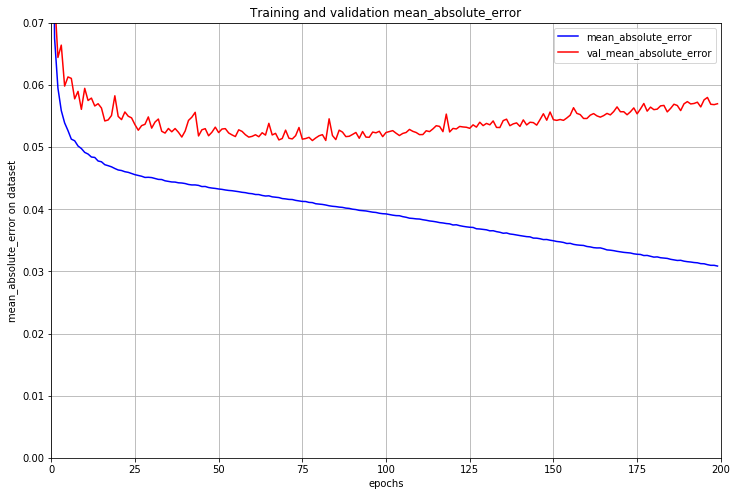

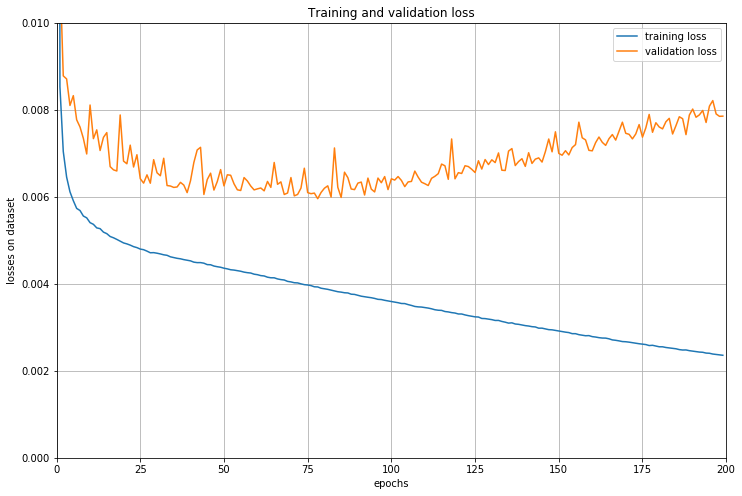

In [52]:
# Plotting and saving the plots of history of the training

epochs_plt_start = 0
epochs_plt_end = val_loss_mse.shape[0]

fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs_plt_start,epochs_plt_end),loss_mae,label='mean_absolute_error', color = "blue")
plt.plot(range(epochs_plt_start,epochs_plt_end),val_loss_mae,label='val_mean_absolute_error', color = "red")
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([epochs_plt_start,epochs_plt_end])
plt.ylabel('mean_absolute_error on dataset')
plt.ylim([0,0.07])
plt.grid(True)
plt.title("Training and validation mean_absolute_error")
plt.show()
fig.savefig('./Weights/mean_absolute_error_200.png')
plt.close(fig)

fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs_plt_start,epochs_plt_end),loss_mse,label='training loss')
plt.plot(range(epochs_plt_start,epochs_plt_end),val_loss_mse,label='validation loss')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([epochs_plt_start,epochs_plt_end])
plt.ylabel('losses on dataset')
plt.ylim([0,0.010])
plt.grid(True)
plt.title("Training and validation loss")
plt.show()
fig.savefig('./Weights/loss_200.png')
plt.close(fig)

In [53]:
spio.savemat('./Weights/ML_train_history_200.mat', {'loss_mae':loss_mae,'val_loss_mae':val_loss_mae,'loss_mse':loss_mse,'val_loss_mse':val_loss_mse})

## Rest is to obtain and visualize predictions for the test set with the trained ML model

#### Here predictions are multiplied with the output_norm_factor and then stored for later usage in the codes.
#### Also from the output of the cell the run time with GeForce GTX 850M can be observed (900us)

1041/1041 [==============================] - 1s 900us/step


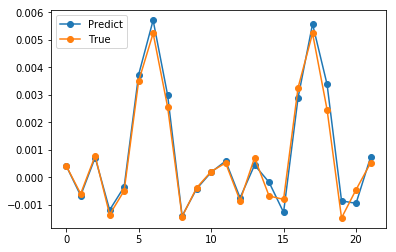

In [56]:
predictions_VVD= model.predict(Test_frames,verbose = 1)

plt.plot(predictions_VVD[10,:]*output_norm_factor,label='Predict',marker='o')

plt.plot(Test_LS_est_overall[10,:],label='True',marker='o')

plt.legend()

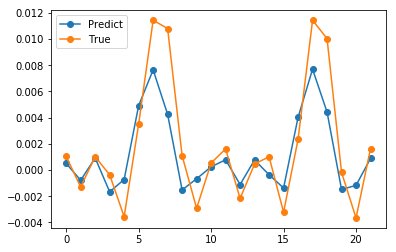

In [57]:
plt.plot(predictions_VVD[65,:]*output_norm_factor,label='Predict',marker='o')

plt.plot(Test_LS_est_overall[65,:],label='True',marker='o')

plt.legend()

In [59]:
print(predictions_VVD.shape)
Tap_num = 11
predictions_LS11 = np.copy(predictions_VVD[:,0:Tap_num]*output_norm_factor+predictions_VVD[:,Tap_num:Tap_num*2]*output_norm_factor*1j)
print(predictions_LS11.shape)

(1041, 22)
(1041, 11)


In [60]:
# import scipy.io as spio
spio.savemat('F:\Git\Codes\Artifacts_Evaluation\Chan_Est_Datasets\VVD_Ests\set8_11Tap_ML_predict_current.mat', {'prediction_LS_11Tap':predictions_LS11})